# Ipl Score Predictor Using Machine Learning

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

# Data Loading

In [111]:
df = pd.read_csv(r"C:\Users\adinr\Ipl Score Predictor_yt\ipl_data.csv")

print("Rows and Columns",df.shape)
df.head(3)

Rows and Columns (76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [113]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


# Data Cleaning and EDA

In [114]:
print("Checking for Null values")
df.isna().sum()

Checking for Null values


mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [115]:
print("Checking for Duplicates")
df.duplicated().sum()

Checking for Duplicates


0

In [116]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [117]:
numeric_cols = df.select_dtypes(['int64','float64']).columns
numeric_cols

Index(['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

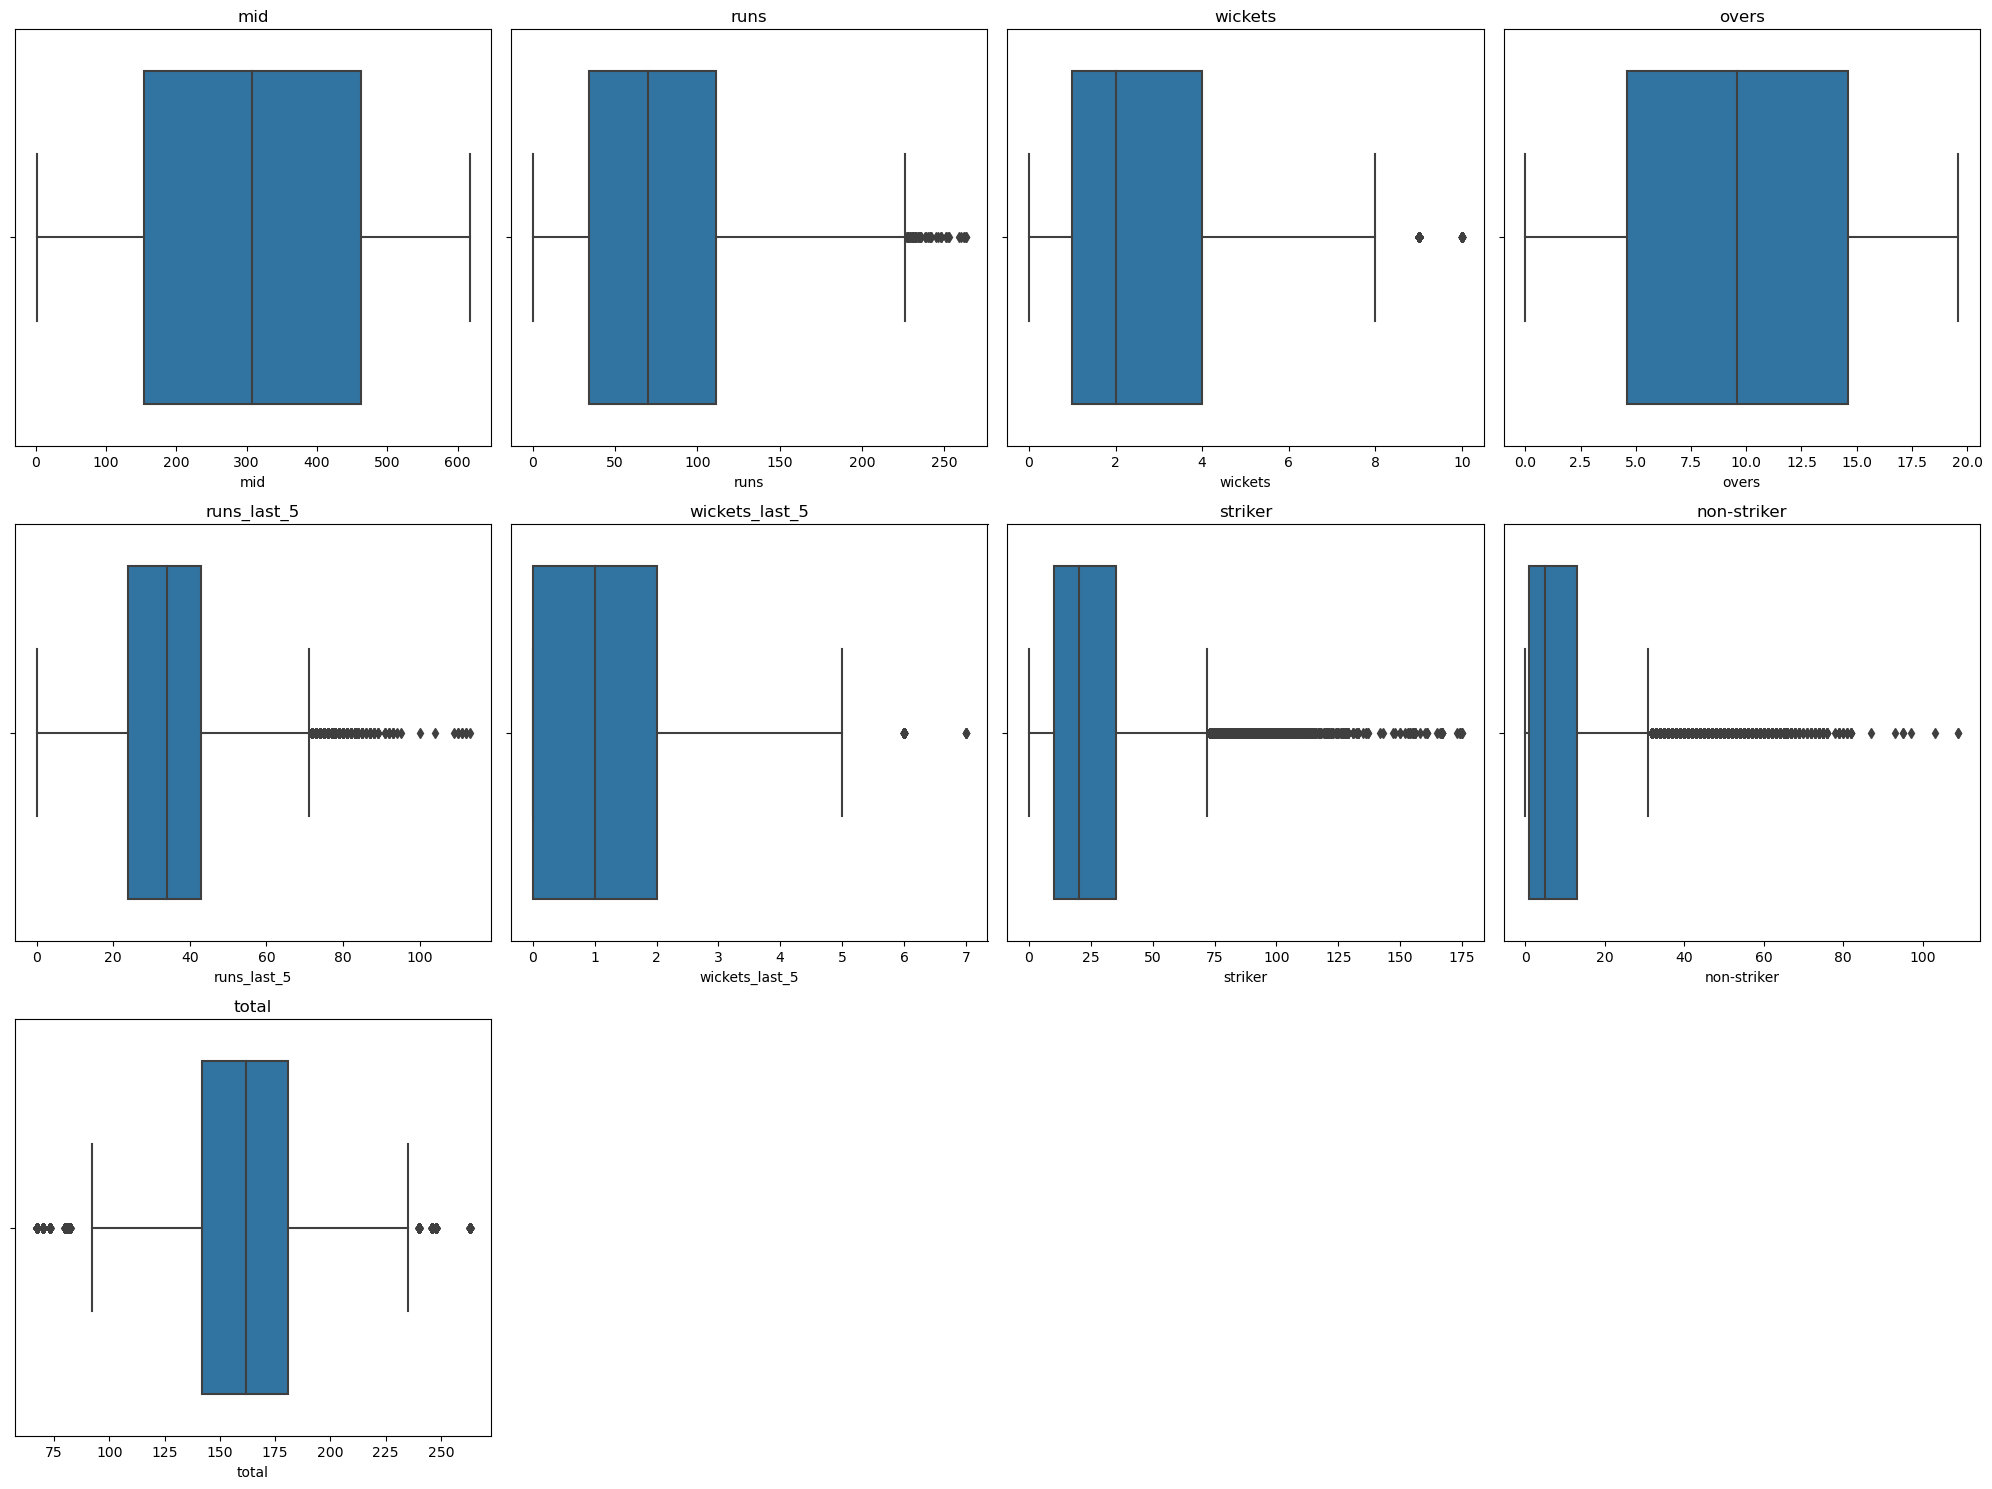

In [118]:
import math
plots_per_row = 4
# Calculate the number of rows needed
num_cols = len(numeric_cols)
rows = math.ceil(num_cols / plots_per_row)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [119]:
print(df['mid'].nunique())

 #Total 617 matchdays in the dataframe.
# We will drop the mid since it doesnt impact the target variable


617


In [120]:
df['runs'].describe()

count    76014.000000
mean        74.889349
std         48.823327
min          0.000000
25%         34.000000
50%         70.000000
75%        111.000000
max        263.000000
Name: runs, dtype: float64

In [121]:
df.query('runs >= 240')['mid'].unique()

array([  2, 142, 343, 546], dtype=int64)

In [122]:
df[df['wickets'] == 10]['total'].unique()

# Many matches in which wickets dropped to 10 so we will kepp those rows

array([110, 182, 165, 109, 126, 103,  67, 101, 163, 105, 116, 129,  92,
       159, 111,  82,  95,  81, 118,  97, 112, 115, 100, 128, 138, 124,
       117,  80,  70, 173, 166, 113,  98, 154, 158, 131, 134, 161,  73,
       107], dtype=int64)

In [123]:
df['wickets_last_5'].describe()

count    76014.000000
mean         1.120307
std          1.053343
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: wickets_last_5, dtype: float64

In [124]:
df['total'].describe()

count    76014.000000
mean       160.901452
std         29.246231
min         67.000000
25%        142.000000
50%        162.000000
75%        181.000000
max        263.000000
Name: total, dtype: float64

In [125]:
print(df.query('total <= 90')['total'].nunique())
print(df.query('total <= 90').shape)

6
(722, 15)


In [126]:
# There are 6 matches in which the target was below 90, we will remove those matches.
df = df.query('total >= 90')
print(df.shape)

(75292, 15)


### Categorical Columns:

In [127]:
df.select_dtypes(exclude=['int64','float64']).columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'], dtype='object')

In [128]:
categorical_cols = ['bat_team']

In [129]:
for col in categorical_cols:
    print(f"col =>{col}, {df[col].unique()}")

col =>bat_team, ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


### keeping only consistent and current teams

In [130]:
consistent_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals',
 'Mumbai Indians','Kings XI Punjab',
 'Royal Challengers Bangalore','Delhi Daredevils',
 'Sunrisers Hyderabad']


In [131]:
print(len(df[df[['bat_team','bowl_team']].isin(consistent_teams)]['bat_team'].unique()))
print(len(df[df[['bat_team','bowl_team']].isin(consistent_teams)]['bat_team'].unique()))

9
9


In [132]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
df.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222


### Removing the first 5 overs of the Match (Powerplay overs):

In [133]:
print("Before removing the first 5 overs of the match",df.shape)

df = df.query('overs >= 5.0')

print("After removing the first 5 overs of the match ",df.shape)

Before removing the first 5 overs of the match (53301, 15)
After removing the first 5 overs of the match  (39755, 15)


In [134]:
numeric_cols

Index(['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

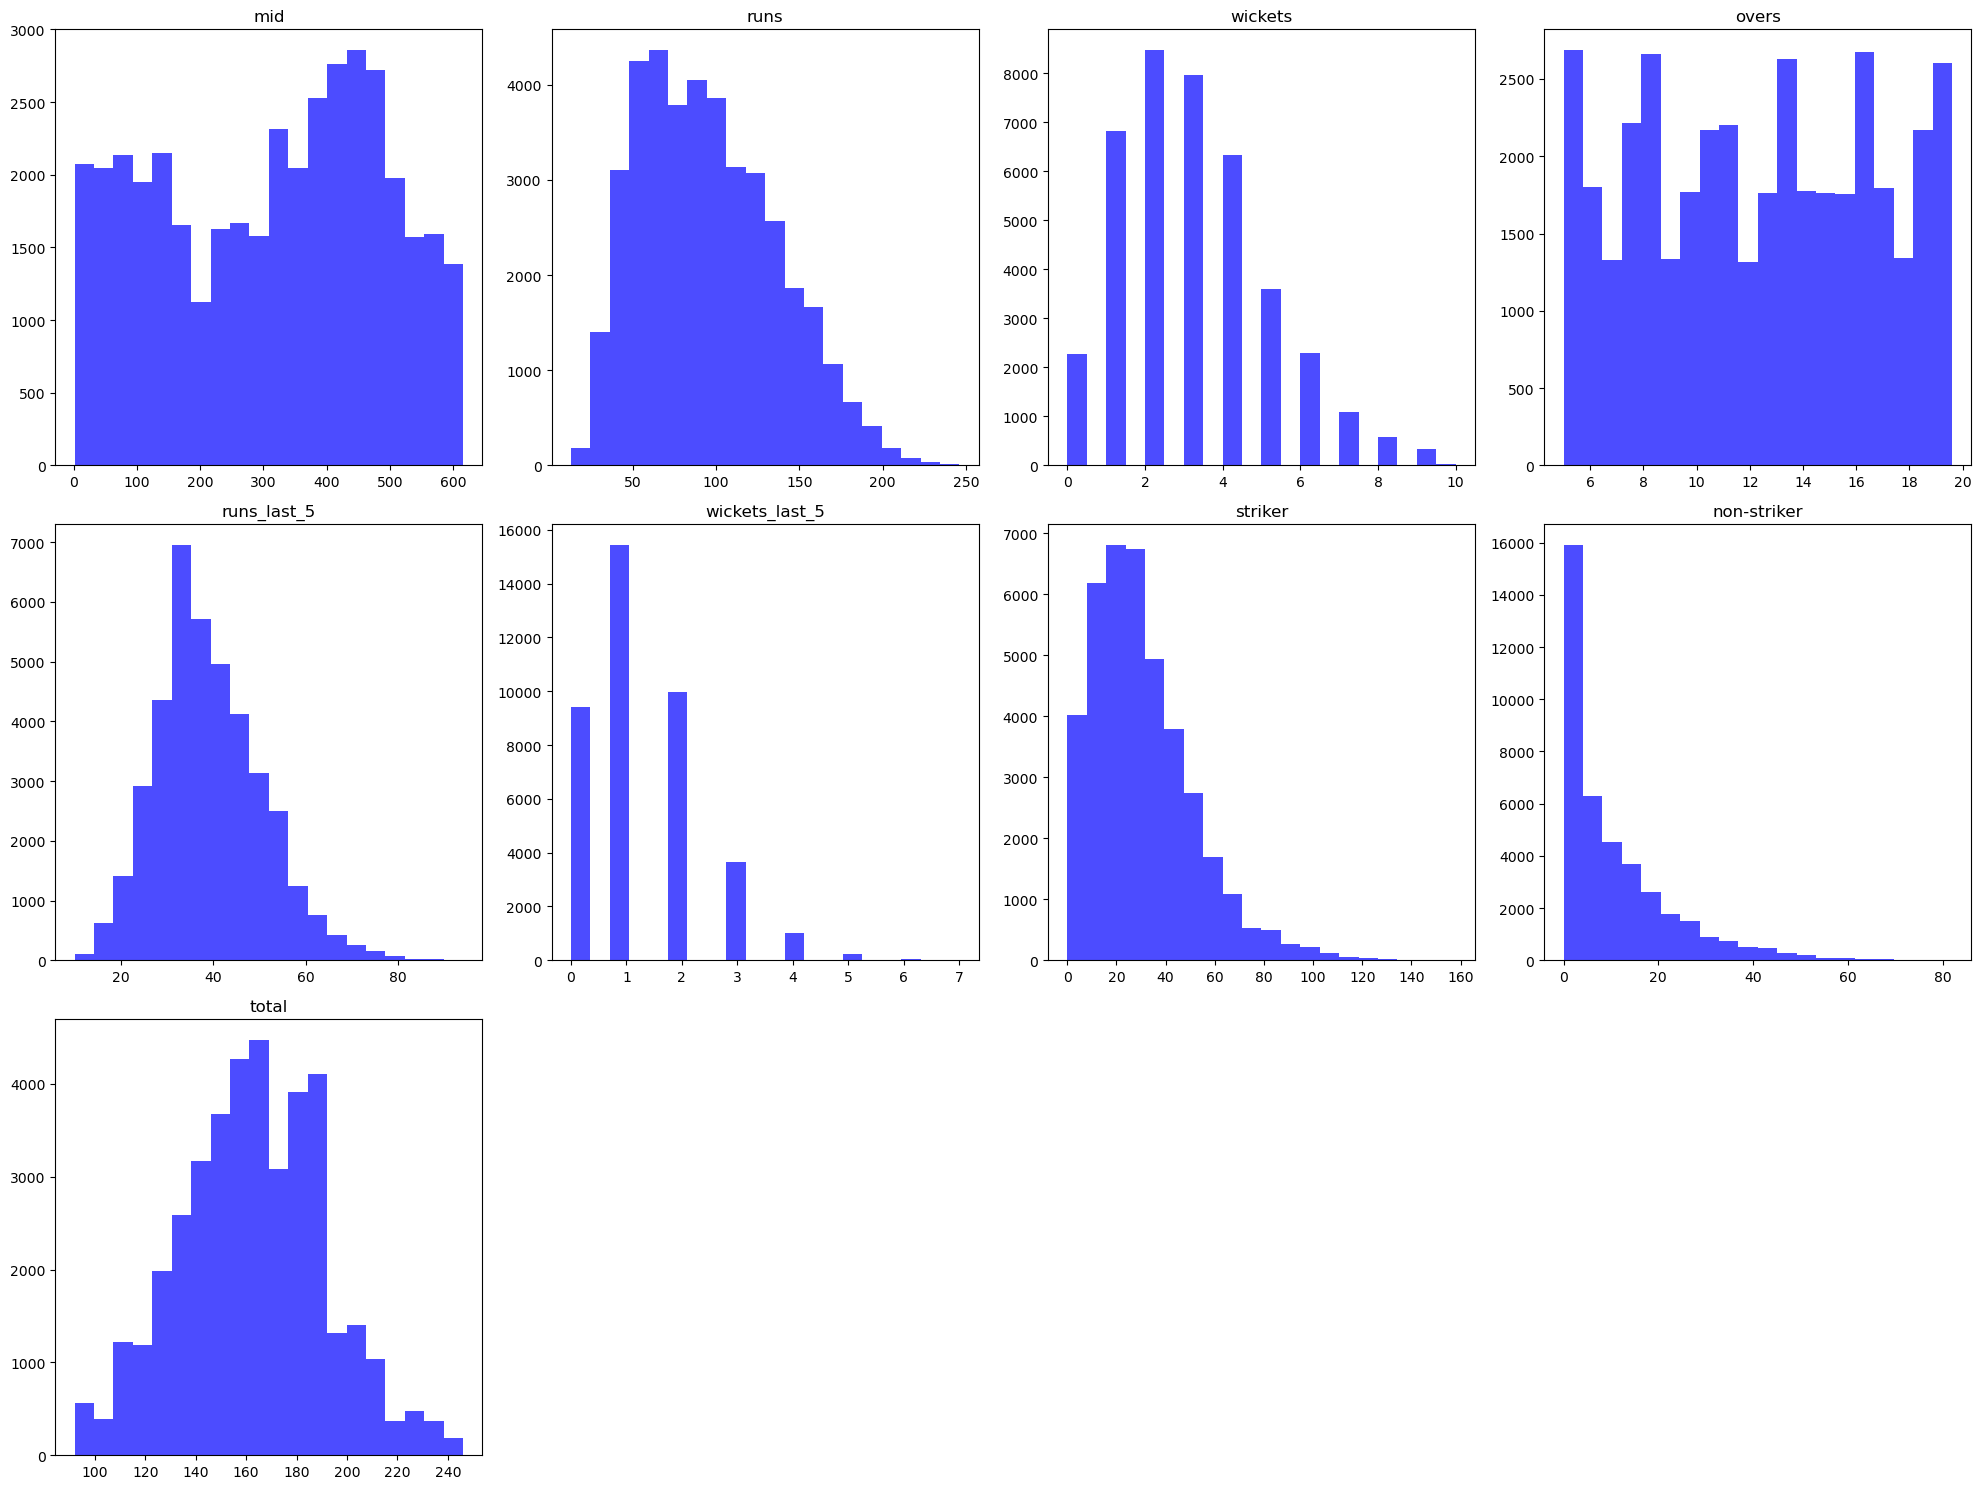

In [135]:
import math
# Number of plots per row
plots_per_row = 4

# Calculate the number of rows needed
num_cols = len(numeric_cols)
rows = math.ceil(num_cols / plots_per_row)

# Create subplots
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='blue', alpha=0.7)  # Customize bins, color, and transparency
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [136]:
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,222
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,222


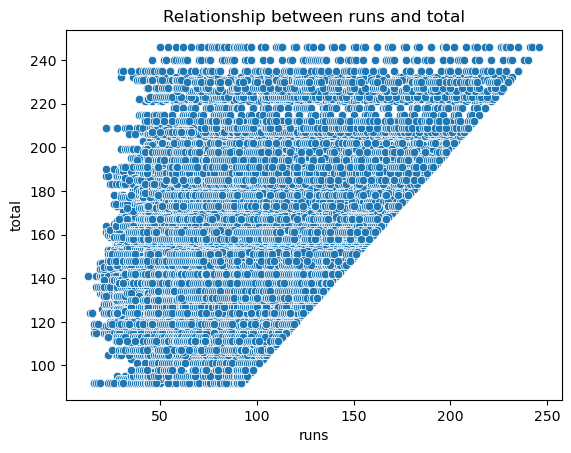

In [137]:
sns.scatterplot(df,x=df['runs'],y=df['total'])
plt.title("Relationship between runs and total")
plt.show()

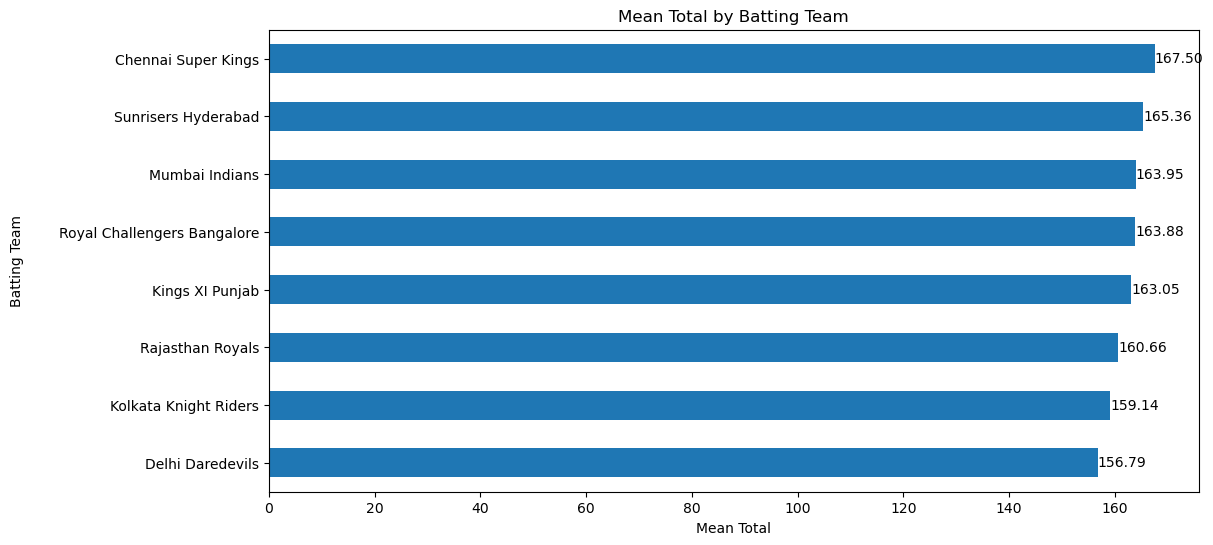

In [138]:
ax = df.groupby('bat_team')['total'].mean().reset_index(name='mean_total') \
    .sort_values(by='mean_total', ascending=True) \
    .round({'mean_total': 2}) \
    .plot(kind='barh', x='bat_team', y='mean_total', figsize=(12, 6), legend=False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') 

# Add labels and title
ax.set_xlabel('Mean Total')
ax.set_ylabel('Batting Team',labelpad=25)
ax.set_title('Mean Total by Batting Team')

plt.show()

# Feature Engineering and Encoding:

### Dropping Unwanted Columns based on domain knowledge:

In [139]:
df = df.drop(columns=['mid','date','venue','batsman','bowler','striker','non-striker'])
df.head(3)

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222


In [140]:
numeric_cols = df.select_dtypes(exclude=['object']).columns
numeric_cols

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'], dtype='object')

In [141]:
df.head(3)

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222


#### One hot encoding categorical variables:

In [142]:
df_encoded = pd.get_dummies(data=df,columns=['bat_team','bowl_team'],drop_first=True)
df_encoded.head(3)

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,False,False,True,False,False,False,False,False,False,False,False,False,True,False
33,61,1,5.2,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,True,False
34,61,1,5.3,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,True,False


### Train Test Split 

In [143]:
X = df_encoded.drop('total',axis='columns')
y = df_encoded['total']


In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(29816, 19) (9939, 19)
(29816,) (9939,)


### Check for Mulitco-linearity

In [145]:
numeric_cols

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'], dtype='object')

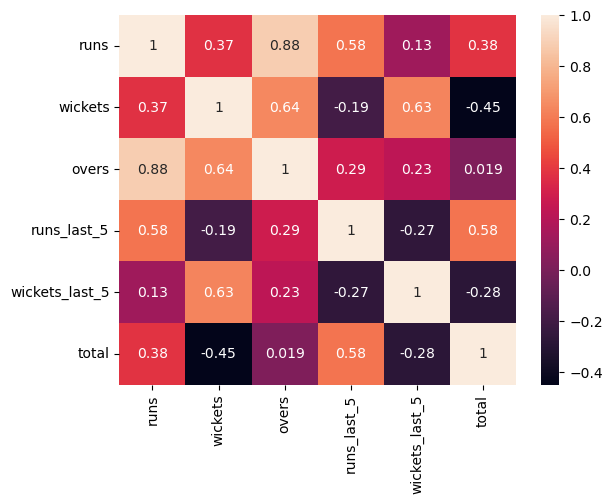

In [146]:
cm = df_encoded[numeric_cols].corr()

sns.heatmap(cm,annot=True)
plt.show()

### Calculate VIF:

In [147]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['columns'] = data.columns
    vif_df['vif'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]

    return vif_df

In [148]:
calculate_vif(df_encoded[numeric_cols.drop(['total'])])

,columns,vif
0,runs,43.162983
1,wickets,14.660284
2,overs,69.151085
3,runs_last_5,10.659177
4,wickets_last_5,4.402143


In [149]:
calculate_vif(df_encoded[numeric_cols.drop(['total','runs'])])

,columns,vif
0,wickets,12.385469
1,overs,22.950266
2,runs_last_5,9.947408
3,wickets_last_5,4.302235


###

#### We will keep runs even though it has high mulitcollinearity: runs has a good co-relation with the target variable also based on domain knowledge runs have some predictive power on the target. 

# Model Training

#### Custom Function for model training and calculating the metrics:

In [150]:

def get_results(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)

    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    print( f"Model => {model} ")
    print( f"Train Score => {round(train_score,2)}")
    print( f"Test Score =>  {round(test_score,2)}")
    print( f"MSE =>         {round(mse,4)}")
    print( f"RMSE =>        {round(rmse,2)}")



### Linear Regression Model

In [151]:
get_results(LinearRegression(),X_train,y_train,X_test,y_test)

Model => LinearRegression() 
Train Score => 0.65
Test Score =>  0.65
MSE =>         288.4972
RMSE =>        16.99


### Ridge Regression Model

In [152]:
get_results(Ridge(),X_train,y_train,X_test,y_test)

Model => Ridge() 
Train Score => 0.65
Test Score =>  0.65
MSE =>         288.4973
RMSE =>        16.99


### RandomForest Model

In [153]:
get_results(RandomForestRegressor(),X_train,y_train,X_test,y_test)

Model => RandomForestRegressor() 
Train Score => 0.99
Test Score =>  0.92
MSE =>         65.4562
RMSE =>        8.09


#### Since RandomForestRegressor() is giving good results we will stick with it:

# Model Fine Tuning:

In [154]:
best_model = RandomForestRegressor()
best_model.fit(X_train,y_train)

RandomForestRegressor()

## Error Analysis

In [155]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test

residual_pct = residuals * 100 / y_test

results_df = pd.DataFrame (

     { 'actual_value': y_test,
       'predicted_value':y_pred,
       'residuals': residuals,
       'residuals_pct': residual_pct
     }
)

results_df.head()

,actual_value,predicted_value,residuals,residuals_pct
8419,187,189.22,2.22,1.187166
59082,192,193.25,1.25,0.651042
11454,119,119.20,0.20,0.168067
45170,170,166.75,-3.25,-1.911765
56880,167,164.35,-2.65,-1.586826


In [156]:
results_df.residuals_pct.describe()

count    9939.000000
mean        0.322096
std         5.306651
min       -37.878378
25%        -1.630941
50%         0.017647
75%         1.649627
max        87.641509
Name: residuals_pct, dtype: float64

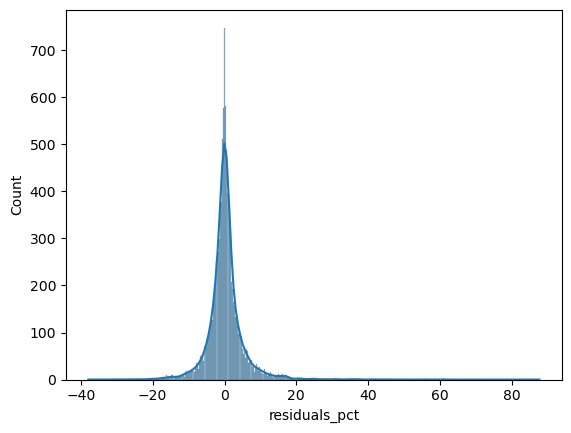

In [157]:
sns.histplot(results_df,x='residuals_pct',kde=True)
plt.show()

In [158]:
extreme_threshold = 10

extreme_results_df = results_df[np.abs(results_df['residuals_pct']) > extreme_threshold]
extreme_results_df.head(3)
print(extreme_results_df.shape)

(553, 4)


In [159]:
extreme_results_df.shape[0] * 100 / results_df.shape[0]

5.563940034208673

#### For Error margin of more than 10% We have 559 rows
#### This means for 5.56% of the matches we will predict the total by more or less than 10% Runs.

In [160]:
results_df[np.abs(results_df['residuals_pct']) > 50].shape

(8, 4)

# Reverse Scaling

#### We will now visualize from where these errors are coming from:

In [161]:
extreme_results_df.index

Index([34628, 28233, 33741, 23904, 49061, 57253, 68270, 16759, 24418, 20131,
       ...
       19757, 10367, 48423,   163,  2277, 49062, 41663, 32265, 12887, 52993],
      dtype='int64', length=553)

In [162]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
34628,86,1,10.2,31,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False
28233,30,1,5.6,19,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False
33741,42,0,5.3,41,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False
23904,59,0,5.3,49,0,True,False,False,False,False,False,False,False,True,False,False,False,False,False
49061,140,2,14.2,76,1,False,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49062,141,2,14.2,71,1,False,True,False,False,False,False,False,False,False,False,False,False,False,True
41663,50,3,7.4,25,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
32265,44,1,5.5,40,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False
12887,70,3,9.4,30,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [163]:
extreme_errors_df = extreme_errors_df[numeric_cols.drop('total')]

In [164]:
cols_to_check_error = X_test.select_dtypes(exclude=['bool'])
cols_to_check_error.head(2)

,runs,wickets,overs,runs_last_5,wickets_last_5
8419,117,0,10.5,62,0
59082,101,1,9.2,45,1


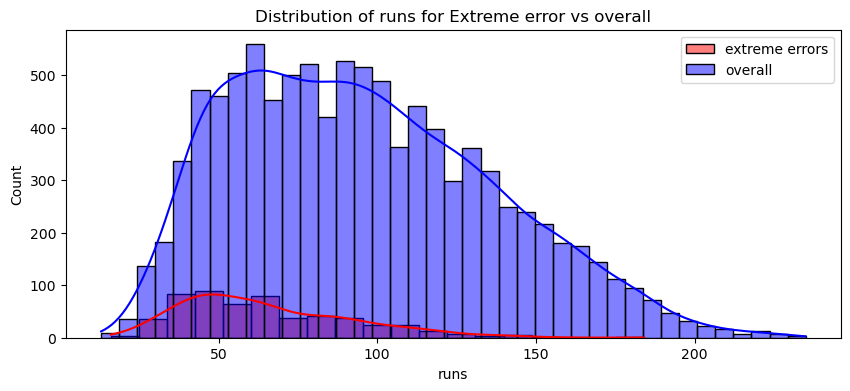

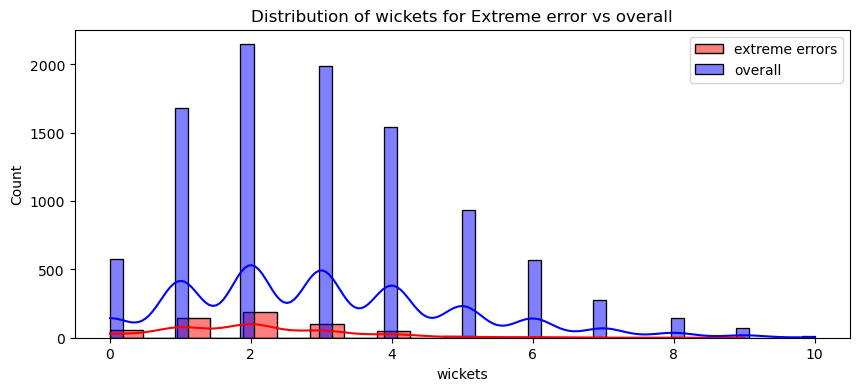

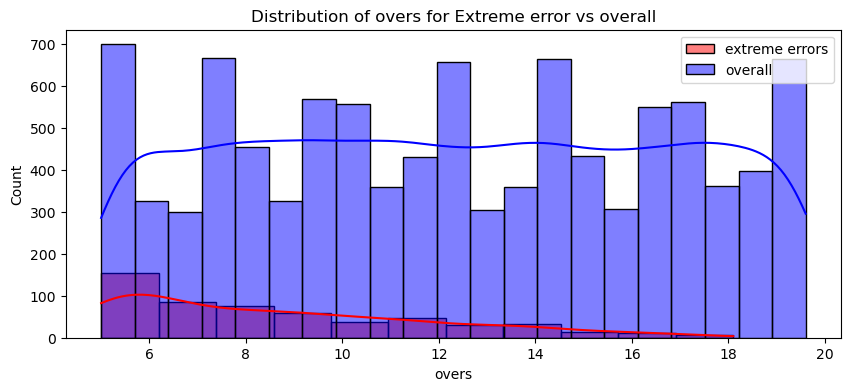

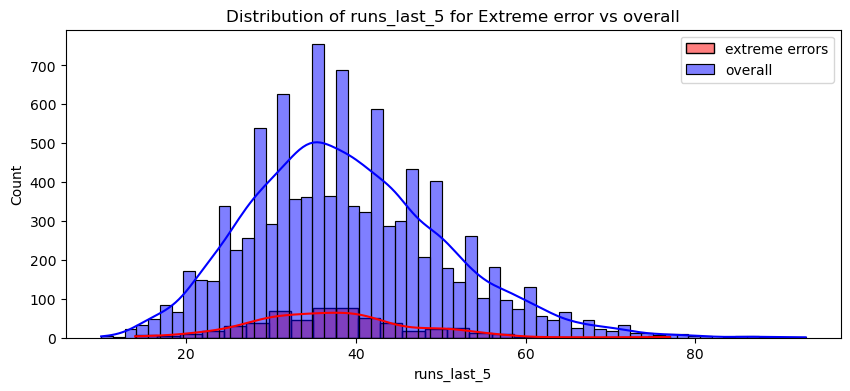

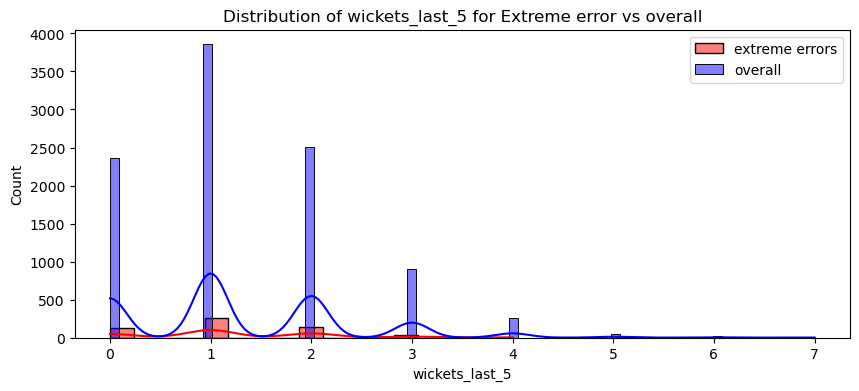

In [165]:
for feature in cols_to_check_error.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_errors_df[feature],color='red',label='extreme errors',kde=True)
    sns.histplot(X_test[feature],color='blue',label='overall',kde=True)
    plt.title(f'Distribution of {feature} for Extreme error vs overall')
    plt.legend()
    plt.show()

### Feature Importances:

In [166]:
features_importances = best_model.feature_importances_
features_importances

array([0.22569802, 0.18140473, 0.1031373 , 0.29213552, 0.02301305,
       0.01022096, 0.01256497, 0.01384565, 0.01541126, 0.01168385,
       0.01362887, 0.00805615, 0.01124704, 0.01287909, 0.01135406,
       0.01516366, 0.01476766, 0.0153271 , 0.00846108])

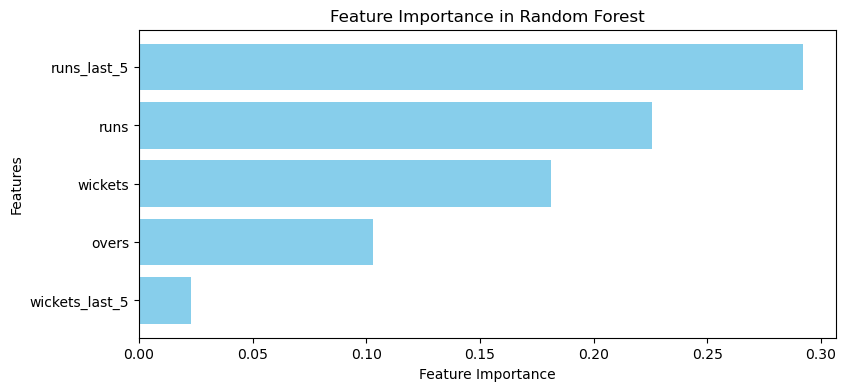

In [167]:
# Assuming `X_train` is your training DataFrame

feature_names = X_train.columns
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(9, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To have the highest importance on top
plt.show()

In [173]:
manual_data = {
    'runs': [170],  # Total runs scored by the batting team
    'wickets': [1],  # Number of wickets taken
    'overs': [12],  # Total overs played
    'runs_last_5': [30],  # Runs scored in the last 5 overs
    'wickets_last_5': [2],  # Wickets taken in the last 5 overs
    'bat_team_Delhi Daredevils': [0],  # If batting team is Delhi Daredevils
    'bat_team_Kings XI Punjab': [0],  # If batting team is Kings XI Punjab
    'bat_team_Kolkata Knight Riders': [0],  # If batting team is Kolkata Knight Riders
    'bat_team_Mumbai Indians': [1],  # If batting team is Mumbai Indians
    'bat_team_Rajasthan Royals': [0],  # If batting team is Rajasthan Royals
    'bat_team_Royal Challengers Bangalore': [0],  # If batting team is Royal Challengers Bangalore
    'bat_team_Sunrisers Hyderabad': [0],  # If batting team is Sunrisers Hyderabad
    'bowl_team_Delhi Daredevils': [1],  # If bowling team is Delhi Daredevils
    'bowl_team_Kings XI Punjab': [0],  # If bowling team is Kings XI Punjab
    'bowl_team_Kolkata Knight Riders': [0],  # If bowling team is Kolkata Knight Riders
    'bowl_team_Mumbai Indians': [0],  # If bowling team is Mumbai Indians
    'bowl_team_Rajasthan Royals': [0],  # If bowling team is Rajasthan Royals
    'bowl_team_Royal Challengers Bangalore': [0],  # If bowling team is Royal Challengers Bangalore
    'bowl_team_Sunrisers Hyderabad': [0]  # If bowling team is Sunrisers Hyderabad
}

In [174]:
# Convert manual_data dictionary into a DataFrame
manual_data_df = pd.DataFrame(manual_data)

# Apply the same one-hot encoding (pd.get_dummies) to match the columns in X_train
manual_data_encoded = pd.get_dummies(manual_data_df)

manual_data_encoded = manual_data_encoded.reindex(columns=X_train.columns, fill_value=0)

predicted_score = best_model.predict(manual_data_encoded)

# Output the predicted score
print(predicted_score)

[183.66]


### Model Packaging and Dumping:

In [170]:
# from joblib import dump

# dump(best_model,"artifacts/model_1.joblib")
# print("Dumped succesfully")